In [9]:
from library.common import Database
import pandas as pd

db = Database()
db_table = 'owid_co2_greenhouse_gas_emissions'
owid_df = pd.read_sql(db_table, db.config)

owid_df
full_features = list(owid_df.columns)
#drop continuents
owid_df = owid_df.dropna(subset = ['iso_code']).copy()
owid_df

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,ZWE,Zimbabwe,2016,10.738,12.153,-12.17,-1.488,1.415,0.765,0.866,...,4.703,11.92,0.85,6.55,0.467,14030338.0,2.096179e+10,47.5,3385.574,1.889
25200,ZWE,Zimbabwe,2017,9.582,11.248,-10.77,-1.156,1.666,0.673,0.790,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
25201,ZWE,Zimbabwe,2018,11.854,13.163,23.72,2.273,1.308,0.821,0.912,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN
25202,ZWE,Zimbabwe,2019,10.949,12.422,-7.64,-0.905,1.473,0.748,0.848,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [10]:
selected = \
    ['iso_code',
     'year',
     'co2',
     'consumption_co2',
     'co2_growth_abs',
     'trade_co2',
     'co2_per_capita',
     # 'consumption_co2_per_capita',
     'co2_per_gdp',
     'co2_per_unit_energy',
     'coal_co2',
     'cement_co2',
     'flaring_co2',
     'gas_co2',
     'oil_co2',
     'other_industry_co2',
     'population',
     'gdp',
     'primary_energy_consumption']


In [11]:
dataset = owid_df[selected].copy()

dataset = dataset.fillna(0)
global_df = dataset.groupby('year').sum().reset_index(drop = False)
timeseries = global_df[:-2].copy()

In [12]:

import numpy as np
import pmdarima as pm
# from pmdarima.datasets import load_wineind

# this is a dataset from R
# wineind = load_wineind().astype(np.float64)

feature = 'co2'

timeseries = dataset[feature].to_numpy()
stepwise_fit = pm.auto_arima(timeseries,
                             seasonal=False,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,
                             trace =  True,
                             n_jobs =  -1, # don't want convergence warnings
                             stepwise=True)  # set to stepwise

order = stepwise_fit.get_params().get('order')

/Users/koonleong/Documents/UM/UMMADS/Courses - Current/SIADS697-Capstone/power_emissions/venv/lib/python3.7/site-packages/pmdarima/arima/_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=321145.537, Time=2.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=322229.743, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=321305.951, Time=0.93 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=321174.720, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=322227.743, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=321143.783, Time=2.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=321141.900, Time=1.86 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=321143.750, Time=2.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=321142.089, Time=2.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=321145.890, Time=4.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=321139.900, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=321172.720, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=321141.783, Time=0.76 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=321141.750, Time=0.97 sec
 ARIM

Automatically created module for IPython interactive environment
pmdarima version: 1.8.4
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
[CV] fold=11 .........................................................
[CV] fold=12 ..............................................

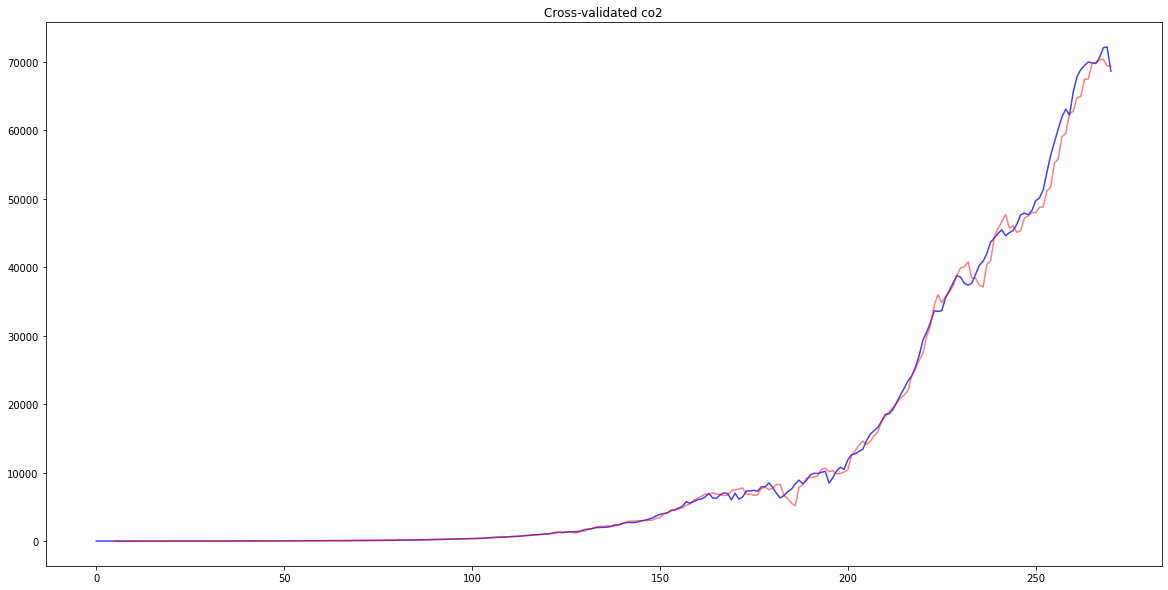

In [13]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from matplotlib import pyplot as plt

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces
y = global_df[feature]
est = pm.ARIMA(order=order,
               # seasonal_order=(0, 1, 1, 12),
               suppress_warnings=True)
cv = model_selection.SlidingWindowForecastCV(window_size=5, step=2, h=4)
predictions = model_selection.cross_val_predict(
    est, y, cv=cv, verbose=2, averaging="median")

# plot the predictions over the original series
x_axis = np.arange(y.shape[0])
n_test = predictions.shape[0]
plt.figure(figsize=(20, 10))
plt.plot(x_axis, y, alpha=0.75, c='b')
plt.plot(x_axis[-n_test:], predictions, alpha=0.5, c='r')  # Forecasts
plt.title(f"Cross-validated {feature}")

plt.show()